# Gene Annotation

Mapping of the relevant CpGs identified by clustering and the associated genes.
The CpGs can be found in folder 'Mammal_Methylation_Levels/Cluster Analysis/Relevant CpGS'. There will be at least 3 files, each with the relevant CpGs of each of the 3 Clocks. 

In [2]:
### Libraries

from Bio import Entrez, SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqRecord import SeqRecord

import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


In [4]:
# Load the csv with the relevant CpGs (Clock1)

rel_cpgs_clock1 = pd.read_csv('../../Mammal_Methylation_Levels/Cluster Analysis/Relevant CpGs/relevant_cpgs.csv') # need to uodated name of this file in the cluster analysis notebook 
rel_cpgs_clock1.rename(columns={'0':'CpG'}, inplace=True)
rel_cpgs_clock1.head()


,CpG
0,cg02499612
1,cg10061379
2,cg09568652
3,cg18918349
4,cg15991909


In [5]:
# Load the HorvathMammalMethylChip40 annotation file

annotation_file = "HorvathMammalMethylChip40.csv"
annotations = pd.read_csv(annotation_file, index_col=0, low_memory=False)
annotations.head()

,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,ProbeA_Ref_CIGAR,AddressB_ID,AlleleB_ProbeSeq,ProbeB_Ref_CIGAR,StrandFR,StrandTB,...,Elephant.loxAfr3.100_CGstart,Elephant.loxAfr3.100_CGend,Elephant.loxAfr3.100_seqnames,Elephant.loxAfr3.100_SYMBOL,Elephant.loxAfr3.100_main_Categories,Cattle.ARS-UCD1.2_CGstart,Cattle.ARS-UCD1.2_CGend,Cattle.ARS-UCD1.2_seqnames,Cattle.ARS-UCD1.2_SYMBOL,Cattle.ARS-UCD1.2_main_Categories
1,cg00000165,cg00000165_B_C_II_16W28R4_Y,61688267,CAAAATCTATTAATACWATAACTTTTAATAAAACAACTAAAACACR...,16W28R4,NaN,NaN,NaN,R,B,...,11412983.0,11412984.0,scaffold_60,BARHL2,Intergenic_upstream,52520158.0,52520159.0,3,BARHL2,Intergenic_upstream
2,cg00001209,cg00001209_B_C_II_15M34_Y,99653471,TCTTAACATTATAAAMAAAACAAAATAATACAAAATATATTCAACC...,15M34,NaN,NaN,NaN,F,B,...,64819638.0,64819639.0,scaffold_7,KIF2A,Intergenic_upstream,17450440.0,17450441.0,20,KIF2A,Intergenic_upstream
3,cg00001364,cg00001364_B_C_II_28Y21_Y,94653210,ACCAATTTAATATAAATCRCTTATATAAYAAACACCTAAAAACAAA...,28Y21,NaN,NaN,NaN,R,B,...,1266053.0,1266054.0,scaffold_74,PROX1,Exon,69576644.0,69576645.0,16,PROX1,Exon
4,cg00001582,cg00001582_B_C_II_17M32_Y,88781221,AACCCTTTAAAAATAAAMTAACCAATATAATCTAACACTTCAACTT...,17M32,NaN,NaN,NaN,R,B,...,NaN,NaN,NaN,NaN,NaN,34702943.0,34702944.0,28,ZMIZ1,Intergenic_upstream
5,cg00002920,cg00002920_B_C_II_M40Y5Y2_Y,03643387,MCATAATTTATTTTCTTAAAATATTAATTTATCAACAACTTYCCTA...,M40Y5Y2,NaN,NaN,NaN,R,B,...,NaN,NaN,NaN,NaN,NaN,47915351.0,47915352.0,26,MKI67,Intergenic_upstream


In [5]:
# Display all column names to see what we have
print(annotations.columns)

Index(['IlmnID', 'Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'ProbeA_Ref_CIGAR',
       'AddressB_ID', 'AlleleB_ProbeSeq', 'ProbeB_Ref_CIGAR', 'StrandFR',
       'StrandTB', 'StrandCO', 'Design_Sequence', 'Forward_Sequence',
       'Top_Sequence', 'SourceSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Next_Base_Alt', 'Color_Channel_Alt', 'CG.',
       'SNP_Count', 'CPG_Count', 'Replicate_Number', 'Replicate_Count',
       'IlmnID_Old', 'Human.Hg19_CGstart', 'Human.Hg19_CGend',
       'Human.Hg19_seqnames', 'Human.Hg19_SYMBOL',
       'Human.Hg19_main_Categories', 'Human.Hg38_start', 'Human.Hg38_end',
       'Human.Hg38_seqnames', 'Human.Hg38_SYMBOL',
       'Human.Hg38_main_Categories', 'Mouse.GRCm38.100_CGstart',
       'Mouse.GRCm38.100_CGend', 'Mouse.GRCm38.100_seqnames',
       'Mouse.GRCm38.100_SYMBOL', 'Mouse.GRCm38.100_main_Categories',
       'Rat.Rnor.6.0.101_CGstart', 'Rat.Rnor.6.0.101_CGend',
       'Rat.Rnor.6.0.101_seqnames', 'Rat.Rnor.6.0.101_SYMBOL',
 

The annotations csv contains the gene annotations for all the species used in the analysis. For now, we will focus on human CpGs and genes.

In [31]:
# Selecting relevant human annotation columns

annotation_cols = [
    'IlmnID', 
    'Human.Hg38_seqnames', 
    'Human.Hg38_start', 
    'Human.Hg38_end', 
    'Human.Hg38_SYMBOL', 
    'Human.Hg38_main_Categories'
]

# Filter the annotation DataFrame to include only the necessary columns
filtered_annotations = annotations.copy()[annotation_cols]
filtered_annotations.head()

# Rename columns for easier understanding and to match desired output
filtered_annotations.rename(columns={
    'IlmnID': 'CpG',
    'Human.Hg38_seqnames': 'chr',
    'Human.Hg38_start': 'start',
    'Human.Hg38_end': 'end',
    'Human.Hg38_SYMBOL': 'gene',
    'Human.Hg38_main_Categories': 'category'
}, inplace=True)
filtered_annotations.head()

# Merge CpG names with annotations to get genomic coordinates and gene information
cpg_annotations = pd.merge(rel_cpgs_clock1, filtered_annotations, on='CpG', how='left')

# Display the merged DataFrame
print(cpg_annotations.head())

          CpG    chr        start          end    gene  category
0  cg02499612   chr9  126615424.0  126615425.0   LMX1B      Exon
1  cg10061379   chr1  167222434.0  167222435.0  POU2F1    Intron
2  cg09568652  chr17   64505527.0   64505528.0    DDX5      Exon
3  cg18918349   chr6  108165956.0  108165957.0   NR2E1  Promoter
4  cg15991909   chr1   32539339.0   32539340.0  ZBTB8A    Intron


In [32]:
# Function to determine region type

def determine_region_type(category):
    if pd.isna(category):
        return 'intergenic'
    if 'TSS1500' in category or 'TSS200' in category: # TSS1500 and TSS200 are both promoter regions
        return 'promoter'
    elif '5\'UTR' in category or '1stExon' in category or 'Body' in category: # 5'UTR, 1stExon, and Body are all gene body regions
        return 'gene body'
    else:
        return 'intergenic'

# Apply the function to determine the region type for each CpG
cpg_annotations['region_type'] = cpg_annotations['category'].apply(determine_region_type)

# Save the annotated CpGs to a CSV file
cpg_annotations.to_csv("clock1_annotated_relevant_cpgs.csv", index=False)

print("Annotation complete. The annotated CpGs have been saved to 'clock1_annotated_relevant_cpgs.csv'.")

Annotation complete. The annotated CpGs have been saved to 'clock1_annotated_relevant_cpgs.csv'.


In [18]:
cpg_annotations.head()

,CpG,chr,start,end,gene,category,region_type
0,cg02499612,chr9,126615424.0,126615425.0,LMX1B,Exon,intergenic
1,cg10061379,chr1,167222434.0,167222435.0,POU2F1,Intron,intergenic
2,cg09568652,chr17,64505527.0,64505528.0,DDX5,Exon,intergenic
3,cg18918349,chr6,108165956.0,108165957.0,NR2E1,Promoter,intergenic
4,cg15991909,chr1,32539339.0,32539340.0,ZBTB8A,Intron,intergenic


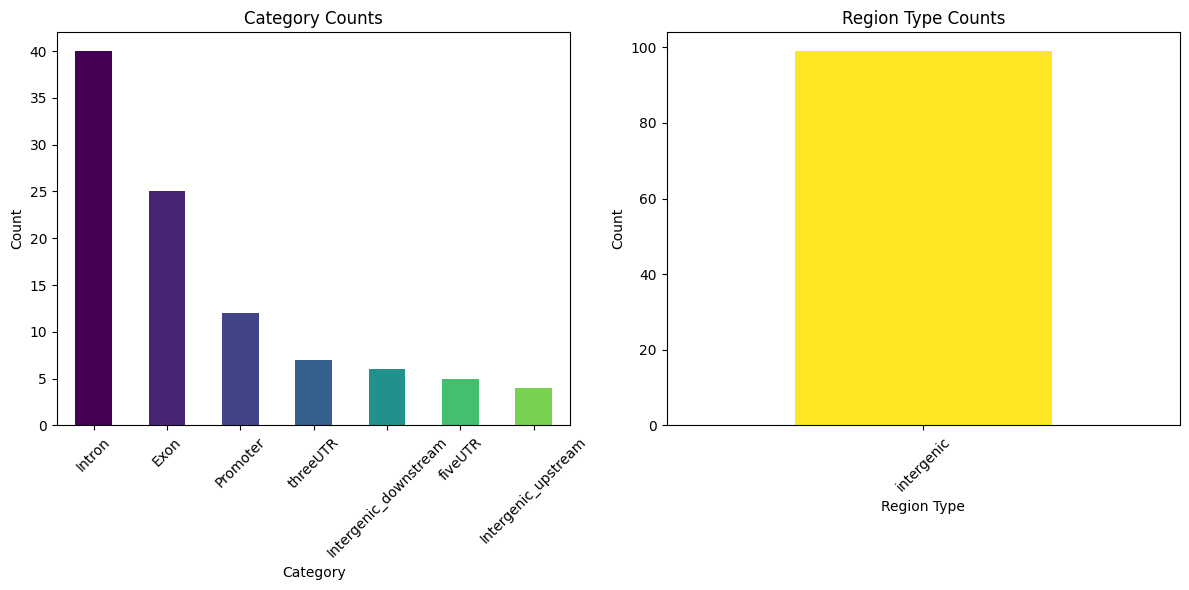

In [45]:
# Viridis color palette
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to the Viridis colors
color_map = {
    'Exon': mcolors.to_hex(viridis_colors[1]),
    'Intron': mcolors.to_hex(viridis_colors[0]),
    'Promoter': mcolors.to_hex(viridis_colors[2]),
    'threeUTR': mcolors.to_hex(viridis_colors[3]),
    'fiveUTR': mcolors.to_hex(viridis_colors[5]),
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[4]),
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[6])
}

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot category counts with predefined colors
category_counts = cpg_annotations['category'].value_counts()
category_colors = [color_map[cat] for cat in category_counts.index]
category_counts.plot(kind='bar', ax=ax[0], color=category_colors)
ax[0].set_title('Category Counts')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].xaxis.set_tick_params(rotation=45)

# Plot region type counts with Viridis colors
(len(cpg_annotations['region_type'].unique()))
region_type_counts = cpg_annotations['region_type'].value_counts()
region_type_counts.plot(kind='bar', ax=ax[1], color=viridis_colors[7])
ax[1].set_title('Region Type Counts')
ax[1].set_xlabel('Region Type')
ax[1].set_ylabel('Count')
ax[1].xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

In [115]:
### Chromosome-wise visualization of the gene annotations of the relevant CpGs in Clock1

# Viridis color palette
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to the Viridis colors
color_map = {
    'Intron': mcolors.to_hex(viridis_colors[0]), #0
    'Exon': mcolors.to_hex(viridis_colors[2]), #1
    'Promoter': mcolors.to_hex(viridis_colors[3]), #2
    'threeUTR': mcolors.to_hex(viridis_colors[4]), #3
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[5]), #4
    'fiveUTR': mcolors.to_hex(viridis_colors[6]), #5
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[7]) #6
}

# Get unique chromosomes and sort them
chromosomes = sorted(cpg_annotations['chr'].unique(), key=lambda x: int(x.replace('chr', '')))

# Create subplots
fig = make_subplots(rows=len(chromosomes), cols=1, 
                    shared_xaxes=True, vertical_spacing=0.02,
                    subplot_titles=chromosomes)

# Add traces for each chromosome
for i, chr in enumerate(chromosomes, start=1):
    chr_cpg_annotations = cpg_annotations[cpg_annotations['chr'] == chr]
    
    # Add gene annotations
    fig.add_trace(
        go.Scatter(
            x=chr_cpg_annotations['start'],
            y=[i]*len(chr_cpg_annotations),
            mode='markers+text',
            marker=dict(
                size=10,
                color=[color_map[cat] for cat in chr_cpg_annotations['category']],
                symbol='square', 
                line=dict(width=0.5, color='black')
            ),
            text=chr_cpg_annotations['gene'],
            textposition='top center',        
            textfont=dict(color='black', size=10),
            hoverinfo='text',
            hovertext=[f"{cpg}<br>{gene}<br>{cat}<br>{start}" 
                       for cpg, gene, cat, start in zip(chr_cpg_annotations['CpG'], chr_cpg_annotations['gene'], 
                                                        chr_cpg_annotations['category'], chr_cpg_annotations['start'])],
            showlegend=False
        ),
        row=i, col=1
    )


# Add legend entries
for category, color in color_map.items():
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color, symbol='square'),
            legendgroup=category,
            showlegend=True,
            name=category
        )
    )

# Update layout
fig.update_layout(
    height=100*len(chromosomes),
    width=1200,
    showlegend=True,
    title='Gene Annotation Visualization of Clock 1 Relevant CpGs',
    hovermode='closest'
)

# Update y-axes
fig.update_yaxes(showticklabels=False, showgrid=False)


# Update x-axes
fig.update_xaxes(title_text='Genomic Position', showgrid=False, range=[0, None]) # range starting at 0 as not to show the x line. If a bit of padding is needed, modify here.


# Show the plot
fig.show()